In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from classicalfield_orig import FiniteTempGPE as gpe 
from VortexLabeling import VortexTracker as vt 
from VortexLabeling import CompareDistances as comp
from PointTracking_v2 import PointTracker as pt

In [ ]:
g = gpe(npoints = 2**6, numImagSteps = 2000, numRealSteps = 500000, dtcoef = 0.0005, boxthickness = 0.4, Nsamples = 1, runAnim = False, Tfact = 1, dst = False, vortex = True)

In [ ]:
v = vt(g.snaps, g.L, g.dx) 
times,dist = zip(*v.distances) 
times,angles = zip(*v.angles)

In [20]:
# try with just two vortices 

def generalAnimation(filename, dataset, periodic = False): 
    time_tracking = np.arange(0, len(dataset))*250*g.gpeobj.dt
    if filename != None: 
            path = fr"C:\Users\TQC User\Desktop\BECs2\{filename}.mp4"
    fig, ax = plt.subplots() 
    if not periodic: 
        data = plt.imshow(dataset[0],  extent = [-g.winL/2, g.winL/2, -g.winL/2, g.winL/2], origin = 'lower')
    else: 
        data = plt.imshow(dataset[0], extent = [-g.winL/2, g.winL/2, -g.winL/2, g.winL/2], cmap = 'twilight', origin = 'lower')
    plt.colorbar() 
    plt.clim(-2*np.pi, 2*np.pi)

     
    L = g.L

    # avi_traj1 = antiv_traj_arr[0] # the trajecory of the ith antivortex 
    # v1 = plt.scatter(avi_traj1[0][0]+0.5-L/2, avi_traj1[0][1]+0.5-L/2, alpha = 0.3, s = 20, color = 'blue')

    # avi_traj2 = antiv_traj_arr[1] # the trajecory of the ith antivortex 
    # v2 = plt.scatter(avi_traj2[0][0]+0.5-L/2, avi_traj2[0][1]+0.5-L/2, alpha = 0.3, s = 20, color = 'blue')


    # try storing in an array 
#     vort_arr = [] 
    
#     for i in range(len(antiv_traj_arr)): 
#          avi_traj = antiv_traj_arr[i] 
#          v = plt.scatter(avi_traj[0][0]+0.5-L/2, avi_traj[0][1]+0.5-L/2, alpha = 0.3, s = 20, color = 'blue')
#          vort_arr.append(v) 
    ### 
    # v1 = vort_arr[0]
    # v2 = vort_arr[1]


    time_text = ax.text(0.05, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes,  bbox=dict(facecolor='red', alpha=0.5))
    time_text.set_text('time = 0')

    plt.xlabel("x", fontsize = 16)
    plt.ylabel('y', fontsize = 16)
    plt.title(f'Animation for L={L}')

    def animate(i): 
        data.set_data(dataset[i])


     #    for j in range(len(vort_arr)): 
     #         vort_arr[j].set_offsets([antiv_traj_arr[j][i][0]+0.5-L/2, antiv_traj_arr[j][i][1]+0.5-L/2])
 
        time_text.set_text('time = %.1d' % time_tracking[i]) # find an array that tracks the time or define one based on dt and the number of points 
        #return data, time_text

        #vort_arr = [v1,v2]
        return data, time_text
    anim = animation.FuncAnimation(fig, animate, frames = len(dataset), blit = True)
    anim.save(path)
    
    plt.show() 

    return anim 
    

In [21]:
tracker = pt(g.snaps, g.dx, g.L, g.gpeobj.dt)
circ_frames = np.zeros((len(g.snaps), len(g.snaps[0])//2, len(g.snaps[0])//2))
vort = []
avort = []
for i in range(len(g.snaps)): 
    detection = pt.detectVortices(tracker, g.snaps[i])
    circ_frames[i] = detection[2] 
    vort.append(detection[0]) 
    avort.append(detection[1])

In [ ]:
generalAnimation("circ_.mp4", circ_frames)

In [23]:
tracks = v.track_vortices_across_frames(avort)

In [ ]:
print(tracks[0]) 

In [ ]:
print(np.shape(track1))

In [ ]:
time = 100
plt.imshow(circ_frames[time], origin = 'lower', extent = [-g.L/2, g.L/2, -g.L/2, g.L/2])
# for i in range(len(tracks)): 
#     for j in range(len(tracks[i])): 
#         if tracks[i][j][0] == time: 
#             print(i)
track1 = tracks[0] 
track2 = tracks[1] 

plt.scatter(track1[time][1]-g.L/2, track1[time][2]-g.L/2, alpha = 0.2, color = 'red')
plt.text(track1[time][1]-g.L/2, track1[time][2]-g.L/2, 1)

plt.scatter(track2[time][1]-g.L/2, track2[time][2]-g.L/2, alpha = 0.2, color = 'red')
plt.text(track2[time][1]-g.L/2, track2[time][2]-g.L/2, 2)

### Make the analysis and average over values 

In [ ]:
c = comp(numRealSteps = 200000, numSamples = 3, temperatures = np.arange(0,1.1,0.2))

Total Imag Time:  1.3049395084381104
kmax:  4.0212385965949355
T:  0.0
(801, 128, 128)
(1, 128, 128)
Total Imag Time:  1.2918946743011475
kmax:  4.0212385965949355
T:  0.0
(801, 128, 128)
(1, 128, 128)
Total Imag Time:  1.299381971359253
kmax:  4.0212385965949355
T:  0.0
(801, 128, 128)
(1, 128, 128)
[3.0 3.125 3.2211762700137974 3.2211762700137974 3.2211762700137974
 3.2211762700137974 3.2211762700137974 3.2211762700137974
 3.2211762700137974 3.2211762700137974 3.2211762700137974
 3.2211762700137974 3.2211762700137974 3.2211762700137974
 3.983608994994363 3.983608994994363 3.983608994994363 3.983608994994363
 3.983608994994363 3.983608994994363 3.983608994994363 3.983608994994363
 3.983608994994363 3.983608994994363 3.983608994994363 3.983608994994363
 3.983608994994363 3.983608994994363 3.983608994994363 3.983608994994363
 3.983608994994363 3.983608994994363 3.983608994994363 3.983608994994363
 3.983608994994363 3.983608994994363 3.983608994994363 3.983608994994363
 3.983608994994363

In [6]:
print(c.distances)

[array([3.        , 3.125     , 3.22117627, 3.22117627, 3.22117627,
       3.22117627, 3.22117627, 3.22117627, 3.22117627, 3.22117627,
       3.22117627, 3.22117627, 3.22117627, 3.22117627, 3.98360899,
       3.98360899, 3.98360899, 3.98360899, 3.98360899, 3.98360899,
       3.98360899, 3.98360899, 3.98360899, 3.98360899, 3.98360899,
       3.98360899, 3.98360899, 3.98360899, 3.98360899, 3.98360899,
       3.98360899, 3.98360899, 3.98360899, 3.98360899, 3.98360899,
       3.98360899, 3.98360899, 3.98360899, 3.98360899, 3.98360899,
       3.98360899, 3.98360899, 4.20716001, 4.20716001, 4.20716001,
       4.20716001, 4.20716001, 4.55543117, 4.55543117, 4.55543117,
       4.55543117, 4.55543117, 4.55543117, 4.55543117, 3.90625   ,
       3.90625   , 3.90625   , 3.90625   , 3.90625   , 3.90625   ,
       3.90625   , 3.90625   , 3.90625   , 3.90625   , 3.90625   ,
       3.90625   , 3.90625   , 3.90625   , 3.90625   , 3.90625   ,
       3.90625   , 3.90625   , 3.90625   , 3.90625   , 3.9062

In [12]:
data = np.array([[0, np.NaN, 1], [1,5,2]])
np.ma.average(np.ma.masked_array(data, np.isnan(data)), axis = 0)

masked_array(data=[0.5, 5.0, 1.5],
             mask=[False, False, False],
       fill_value=1e+20)

In [11]:
print(np.shape(c.distances))

(7, 802)


Text(0.5, 1.0, 'Distance Between Vortices Over Time')

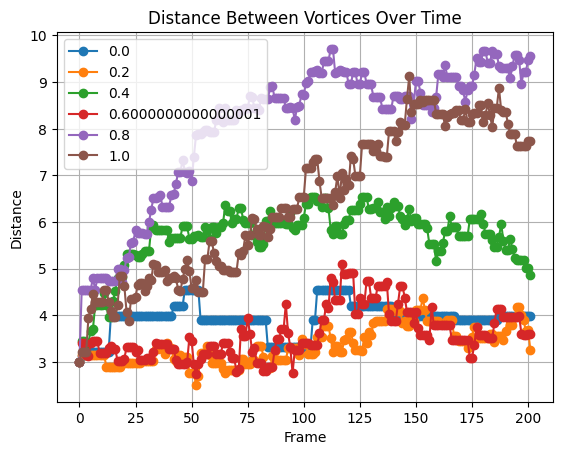

In [3]:
plt.figure() 
for i in range(len(c.distances)): 
    plt.plot( c.distances[i], label = c.temperatures[i], marker = 'o')
plt.grid(True)
plt.legend() 
plt.xlabel("Frame")
plt.ylabel("Distance")
plt.title("Distance Between Vortices Over Time")

Text(0.5, 1.0, 'Angle Between Vortices Over Time')

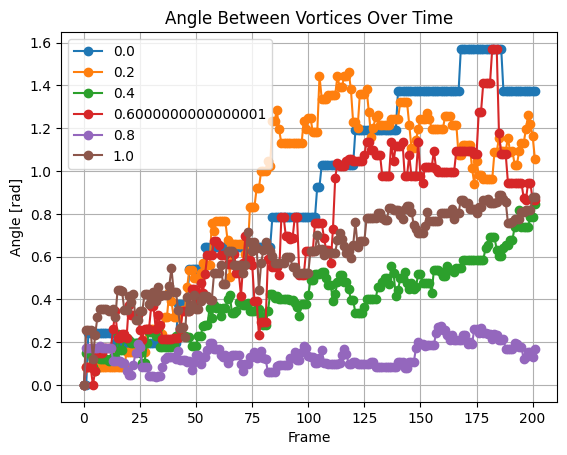

In [4]:
plt.figure() 
for i in range(len(c.angles)): 
    plt.plot( c.angles[i], label = c.temperatures[i], marker = 'o')
plt.grid(True)
plt.legend() 
plt.xlabel("Frame")
plt.ylabel("Angle [rad]")
plt.title("Angle Between Vortices Over Time")

Text(0.5, 1.0, 'Distance Between Vortices Over Time')

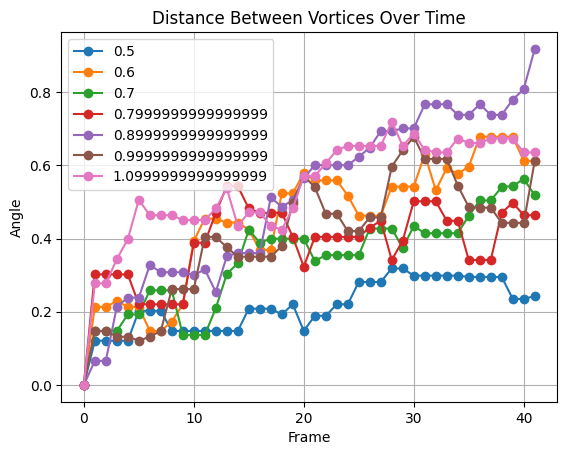

In [4]:
plt.figure() 
for i in range(len(c.distances)): 
    plt.plot( c.angles[i], label = c.temperatures[i], marker = 'o')
plt.grid(True)
plt.legend() 
plt.xlabel("Frame")
plt.ylabel("Angle")
plt.title("Distance Between Vortices Over Time")